In [1]:
import pandas as pd
import sqlite3 as sql

In [2]:
conn = sql.connect('database.sqlite')
conn

In [3]:
def my_sql(q):
    return pd.read_sql_query(q,conn)

In [4]:
q = '''select * from sqlite_master'''
my_sql(q)

,type,name,tbl_name,rootpage,sql
0,table,Salaries,Salaries,2,CREATE TABLE Salaries (\n Id INTEGER PRIMAR...
1,index,salaries_year_idx,Salaries,16566,CREATE INDEX salaries_year_idx ON Salaries (Year)


In [16]:
q = '''select * from salaries'''
df = my_sql(q)
df.to_csv('employeedata.csv')

In [5]:
q = '''pragma table_info(salaries)'''
my_sql(q)

,cid,name,type,notnull,dflt_value,pk
0,0,Id,INTEGER,0,None,1
1,1,EmployeeName,TEXT,0,None,0
2,2,JobTitle,TEXT,0,None,0
3,3,BasePay,NUMERIC,0,None,0
4,4,OvertimePay,NUMERIC,0,None,0
5,5,OtherPay,NUMERIC,0,None,0
6,6,Benefits,NUMERIC,0,None,0
7,7,TotalPay,NUMERIC,0,None,0
8,8,TotalPayBenefits,NUMERIC,0,None,0
9,9,Year,INTEGER,0,None,0


1. What is the average TotalPayBenefits for each JobTitle? exclude ('Not Provided', 'Not provided')

In [6]:
q = '''select avg(totalpaybenefits) as Benefits, jobtitle from salaries where jobtitle != "Not Provided" and jobtitle != "Not provided" group by jobtitle'''
my_sql(q)

,Benefits,JobTitle
0,44035.664337,ACCOUNT CLERK
1,47429.268000,ACCOUNTANT
2,29031.742917,ACCOUNTANT INTERN
3,80266.370000,"ACPO,JuvP, Juv Prob (SFERS)"
4,67594.400000,ACUPUNCTURIST
...,...,...
2153,52705.880385,X-RAY LABORATORY AIDE
2154,69521.123200,X-Ray Laboratory Aide
2155,53632.870000,"YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS"
2156,60118.550000,Youth Comm Advisor


2. Which JobTitle has the most employees in each year? exclude ('Not Provided', 'Not provided')

In [8]:
q = '''select count(employeename) as Emp_Count, jobtitle, year from salaries 
where jobtitle != "Not Provided" and jobtitle != "Not provided" 
group by jobtitle order by year'''
my_sql(q)

,Emp_Count,JobTitle,Year
0,83,ACCOUNT CLERK,2011
1,5,ACCOUNTANT,2011
2,48,ACCOUNTANT INTERN,2011
3,1,ACUPUNCTURIST,2011
4,93,ADMINISTRATIVE ANALYST,2011
...,...,...,...
2153,17,Transportation Planner II,2014
2154,22,Transportation Planner III,2014
2155,16,Transportation Planner IV,2014
2156,1,Undersheriff (SFERS),2014


3. What is the total number of unique employees? exclude ('Not Provided', 'Not provided')

In [20]:
q = '''select distinct employeename from salaries where employeename != "Not Provided" and employeename != "Not provided"'''
len(my_sql(q))

110809

4. Show All Employees Ordered By Their TotalPayBenefits In Descending Order? exclude ('Not Provided', 'Not provided')

In [23]:
q = '''select totalpaybenefits as TotalPay, employeename from salaries 
where employeename != "Not Provided" and employeename != "Not provided" 
order by totalpay desc'''
my_sql(q)

,TotalPay,EmployeeName
0,567595.43,NATHANIEL FORD
1,538909.28,GARY JIMENEZ
2,510732.68,David Shinn
3,479652.21,Amy P Hart
4,436224.36,William J Coaker Jr.
...,...,...
148643,0.00,Roy I Tillery
148644,-2.73,Timothy E Gibson
148645,-8.20,Mark E Laherty
148646,-33.89,David P Kucia


5. Show All Employees With A TotalPaybenefits Value Between 125,000 and 150,000 And A Job Title 'Firefighter'? exclude ('Not Provided', 'Not provided')

In [26]:
q = '''select employeename, jobtitle, totalpaybenefits from salaries 
where totalpaybenefits between 125000 and 150000 
and employeename != "Not Provided" and employeename != "Not provided" 
and jobtitle == "Firefighter"'''
my_sql(q)

,EmployeeName,JobTitle,TotalPayBenefits
0,Randall Henderson,Firefighter,147912.75
1,Virginia Cheung,Firefighter,147862.14
2,Travis Hemenez,Firefighter,147664.12
3,Gail Readdie,Firefighter,147452.17
4,Gregory Ginotti,Firefighter,147216.47
...,...,...,...
110,Stephen J Kloster,Firefighter,126784.13
111,Jeffrey D Ryan,Firefighter,126687.13
112,Jovan R Blake,Firefighter,126169.62
113,Dino M Cafferata,Firefighter,125680.52


6. How many employees have no overtime pay or other pay? exclude ('Not Provided', 'Not provided')


In [27]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.71,198306.9,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737,182234.59,,326373.19,326373.19,2011,,San Francisco,


In [30]:
q = '''select employeename from salaries where employeename != "Not Provided" 
and employeename != "Not provided" and 
otherpay == 0 or overtimepay == 0'''
len(my_sql(q))

84266

7. Show top 10 employees having (overtimepay+OtherPay) in bar plot?  exclude ('Not Provided', 'Not provided')

<Axes: xlabel='EmployeeName'>

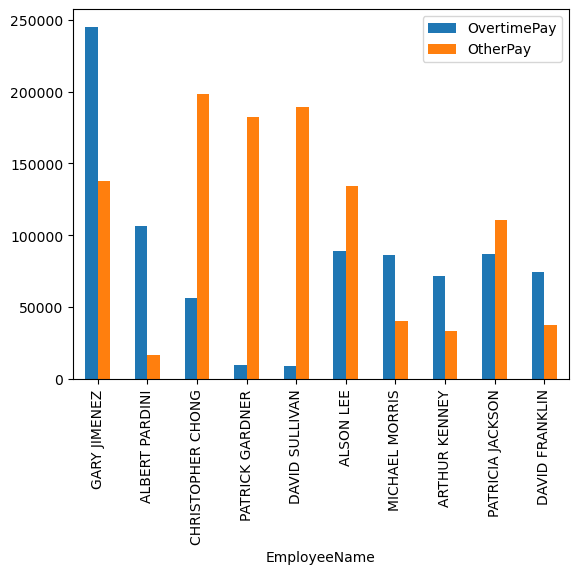

In [45]:
q = '''select employeename, overtimepay, otherpay from salaries order by overtimepay and otherpay desc limit 10'''
top_10_emp = my_sql(q)
top_10_emp.plot(kind='bar',x = 'EmployeeName')

8. Show The Average of BasePay, OverTime, OtherPay for all employees in pie chart? exclude ('Not Provided', 'Not provided')


<Axes: title={'center': 'Employees Pay Distribution'}>

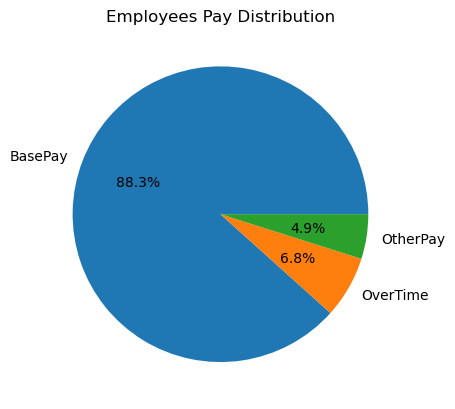

In [78]:
q = '''select AVG(BasePay) as BasePay, AVG(Overtimepay) as OverTime, AVG(otherpay) as OtherPay
from salaries where Employeename != "Not Provided" 
and Employeename != "Not provided"'''
avg_pays = my_sql(q)
avg_pays.iloc[0].plot(kind='pie', autopct='%1.1f%%',title='Employees Pay Distribution',ylabel='')
# type(avg_pays)

9. Get the average TotalPayBenefits for each JobTitle, but only for those with an average pay greater than 75000? exclude ('Not Provided', 'Not provided')


In [82]:
q = '''select jobtitle, AVG(TotalPayBenefits) as Avg_Pay from salaries group by jobtitle having Avg_Pay > 75000 order by Avg_pay desc'''
my_sql(q)

,JobTitle,Avg_Pay
0,Chief Investment Officer,436224.360000
1,Chief of Police,411732.266667
2,"Chief, Fire Department",408865.326667
3,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,399211.275000
4,"Gen Mgr, Public Trnsp Dept",380696.440000
...,...,...
1432,"OPERATING ENGINEER, UNIVERSAL",75273.754200
1433,CABLE SPLICER,75255.005833
1434,Community Development Asst,75246.657391
1435,Senior Legal Process Clerk,75108.724532


10. Get the number of employees (EmployeeName) for each JobTitle, where the count is greater than 10?  exclude ('Not Provided', 'Not provided')


In [84]:
q = '''select Count(Employeename) as Employee, jobtitle from salaries group by jobtitle having Employee > 10 order by employee desc'''
my_sql(q)

,Employee,JobTitle
0,7036,Transit Operator
1,4389,Special Nurse
2,3736,Registered Nurse
3,2518,Public Svc Aide-Public Works
4,2421,Police Officer 3
...,...,...
1151,11,AUTOMOTIVE MECHANIC ASSISTANT SUPERVISOR
1152,11,ASSOCIATE PERFORMANCE AUDITOR
1153,11,ASSISTANT ELECTRONIC MAINTENANCE TECHNICIAN
1154,11,ARTS PROGRAM ASSISTANT
